In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [3]:
path_salvador = "../data/parquet/rcbp/RCBP SALVADOR.parquet"

df = pd.read_parquet(path_salvador)

In [4]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância
360525,RCBP SALVADOR,MASCULINO,None,84.0,SEM INFORMAÇÃO,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,NaN,None,None,NaN,26/03/1996,NaN
360526,RCBP SALVADOR,FEMININO,None,49.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,NaN,None,None,NaN,05/05/1996,NaN
360527,RCBP SALVADOR,FEMININO,14/10/1956,39.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,CASADO,...,LOCALIZADO,None,nan,nan,NaN,CÂNCER,15/02/1998,NaN,15/02/1996,NaN
360528,RCBP SALVADOR,FEMININO,None,30.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,NaN,None,None,NaN,27/03/1996,NaN
360529,RCBP SALVADOR,MASCULINO,None,61.0,PRETA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,NaN,None,None,NaN,27/09/1996,NaN


In [5]:
df.tail()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância
415747,RCBP SALVADOR,MASCULINO,27/07/1964,38.0,PARDA,BRASIL,Não informado,None,SEM INFORMAÇÃO,CASADO,...,LOCALIZADO,None,nan,nan,NaN,CÂNCER,16/03/2006,NaN,17/04/2003,NaN
415748,RCBP SALVADOR,MASCULINO,25/01/1938,65.0,PARDA,BRASIL,BAHIA,None,FUNDAMENTAL II (5ª A 8ª SÉRIE),SOLTEIRO,...,LOCALIZADO,None,nan,nan,NaN,CÂNCER,19/09/2006,NaN,04/12/2003,NaN
415749,RCBP SALVADOR,MASCULINO,15/12/1928,74.0,PARDA,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,NaN,CÂNCER,16/05/2006,NaN,07/10/2003,NaN
415750,RCBP SALVADOR,FEMININO,06/02/2002,1.0,BRANCO,BRASIL,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,NÃO SE APLICA,None,nan,nan,NaN,CÂNCER,17/01/2006,NaN,05/08/2003,NaN
415751,RCBP SALVADOR,FEMININO,18/02/1944,59.0,SEM INFORMAÇÃO,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,NaN,CÂNCER,29/04/2006,NaN,14/08/2003,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46038 entries, 360525 to 415751
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Nome do RCBP                      46038 non-null  object 
 1   Sexo                              46038 non-null  object 
 2   Data de Nascimento                39963 non-null  object 
 3   Idade                             45564 non-null  float64
 4   Raca/Cor                          46038 non-null  object 
 5   Nacionalidade                     46038 non-null  object 
 6   Naturalidade Estado               46038 non-null  object 
 7   Naturalidade                      6606 non-null   object 
 8   Grau de Instrução                 46038 non-null  object 
 9   Estado Civil                      46038 non-null  object 
 10  Código Profissão                  32883 non-null  float64
 11  Nome Profissão                    32883 non-null  object 
 12  Est

In [7]:
df.shape

(46038, 36)

In [8]:
df['Data de Diagnostico'] = pd.to_datetime(df['Data de Diagnostico'], format='%d/%m/%Y')

In [9]:
print(df['Data de Diagnostico'].min())
print(df['Data de Diagnostico'].max())

1996-01-01 00:00:00
2005-12-31 00:00:00


In [10]:
datas = pd.date_range(start='1996-01-01', end='2005-12-31', freq='ME')
print(len(datas))

120


In [11]:
n_unique_months = df['Data de Diagnostico'].dt.to_period('M').nunique()
print(n_unique_months)

120


In [12]:
df_mama = df[df['Descrição da Doenca'].isin(['MAMA , SOE', 'QUADRANTE SUPERIOR EXTERNO DA MAMA', 'PROLONGAMENTO AXILAR DA MAMA',
                                            'QUADRANTE SUPERIOR INTERNO DA MAMA', 'CARCINOMA "IN SITU" DA MAMA, SOE',
                                            'PORCAO CENTRAL DA MAMA', 'QUADRANTE INFERIOR EXTERNO DA MAMA',
                                            'LESAO INVASIVA DA MAMA', 'QUADRANTE INFERIOR INTERNO DA MAMA', 'MAMA'])]

df_prostata = df[df['Descrição da Doenca'] == 'PROSTATA']

df_colo_utero = df[df['Descrição da Doenca'].isin(['COLO DO UTERO, SOE', 'OUTRAS PARTES DO COLO DO UTERO',
                                                  'LESAO INVASIVA DO COLO DO UTERO', 'COLO DO UTERO',
                                                  'CARCINOMA "IN SITU" DO COLO DO UTERO (CERVIX)'])]

df_pele = df[df['Descrição da Doenca'].isin(['PELE DE OUTRAS PARTES DA FACE, SOE', 'PELE DE OUTRAS PARTES DA FACE',
                                            'PELE DO MEMBRO INFERIOR E DO QUADRIL','PELE DA PALPEBRA E CANTO',
                                            'PELE DO TRONCO','NEOPLASIA MALIGNA DA PELE','PELE DO COURO CABELUDO E DO PESCOCO',
                                            'PELE DA ORELHA E CONDUTO AUDITIVO EXTERNO','PELE DO MEMBRO SUPERIOR E DO OMBRO',
                                            'PELE DOS MEMBROS SUPERIORES, INCLUINDO OMBRO','PELE DO LABIO',
                                            'PELE DA ORELHA E DO CONDUTO AUDITIVO EXTERNO','SARCOMA DE KAPOSI DA PELE',
                                            'PELE DA PALPEBRA, INCLUINDO CANTO','PELE DOS MEMBROS INFERIORES, INCLUINDO QUADRIL',
                                            'MELANOMA MALIGNO DA PELE, SOE','PELE, SOE','LESAO INVASIVA DA PELE',
                                            'MELANOMA MALIGNO INVASIVO DA PELE','PELE DE OUTRAS LOCALIZACOES',
                                            'OUTRAS NEOPLASIAS MALIGNAS DA PELE'])]

df_pulmao = df[df['Descrição da Doenca'].isin(['BRONQUIOS OU PULMOES, SOE', 'BRONQUIOS E PULMOES',
                                              'LESAO INVASIVA DOS BRONQUIOS E DOS PULMOES'])]

#### Mama

<Axes: xlabel='Data de Diagnostico'>

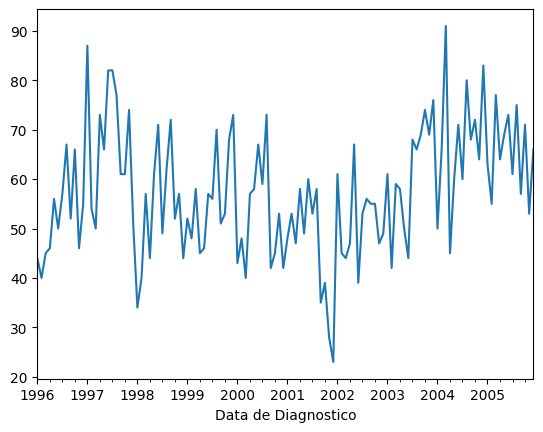

In [13]:
df_mama = df_mama.sort_values(by='Data de Diagnostico')
df_mama = df_mama.set_index('Data de Diagnostico')
result_mama_salvador = df_mama.resample("ME")['Nome do RCBP'].count()

result_mama_salvador.plot()

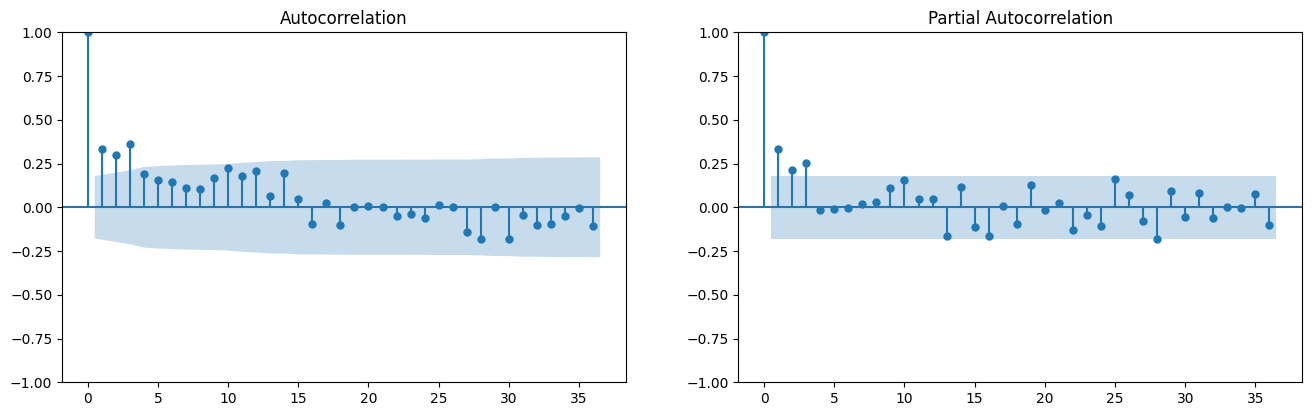

In [14]:
acf_pacf(result_mama_salvador.values, 36)

#### Prostata


<Axes: xlabel='Data de Diagnostico'>

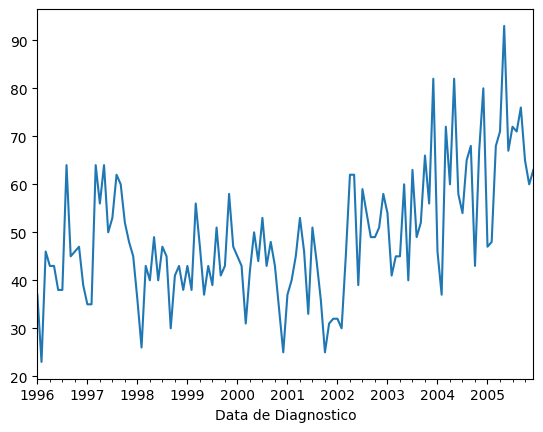

In [15]:
df_prostata = df_prostata.sort_values(by='Data de Diagnostico')
df_prostata = df_prostata.set_index('Data de Diagnostico')
result_prostata_salvador = df_prostata.resample("ME")['Nome do RCBP'].count()

result_prostata_salvador.plot()

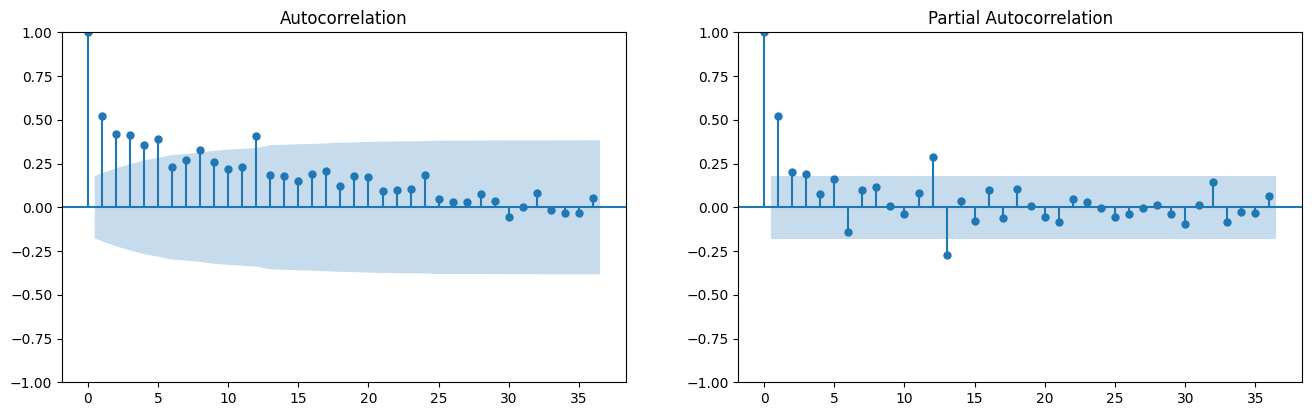

In [16]:
acf_pacf(result_prostata_salvador.values, 36)

#### Utero

<Axes: xlabel='Data de Diagnostico'>

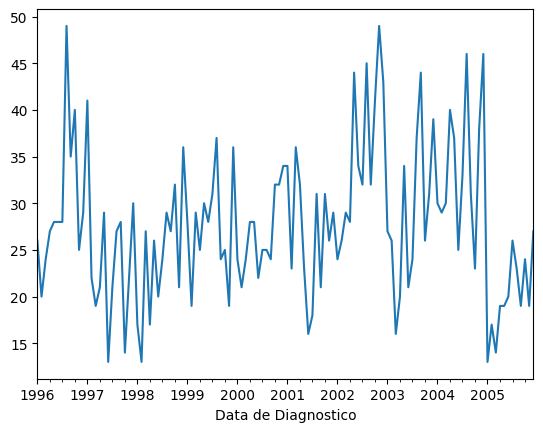

In [17]:
df_colo_utero = df_colo_utero.sort_values(by='Data de Diagnostico')
df_colo_utero = df_colo_utero.set_index('Data de Diagnostico')
result_colo_utero_salvador = df_colo_utero.resample("ME")['Nome do RCBP'].count()

result_colo_utero_salvador.plot()

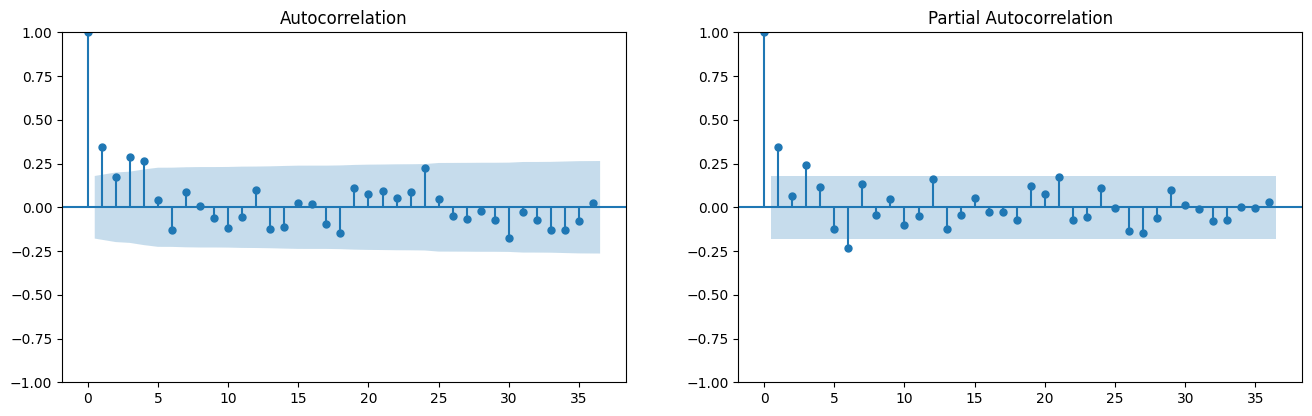

In [18]:
acf_pacf(result_colo_utero_salvador.values, 36)

#### Pele

<Axes: xlabel='Data de Diagnostico'>

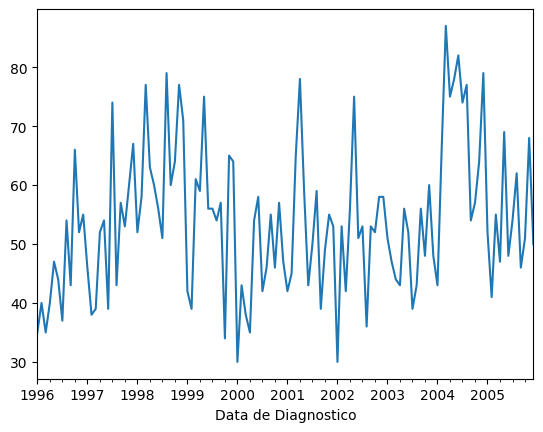

In [19]:
df_pele = df_pele.sort_values(by='Data de Diagnostico')
df_pele = df_pele.set_index('Data de Diagnostico')
result_pele_salvador = df_pele.resample("ME")['Nome do RCBP'].count()

result_pele_salvador.plot()

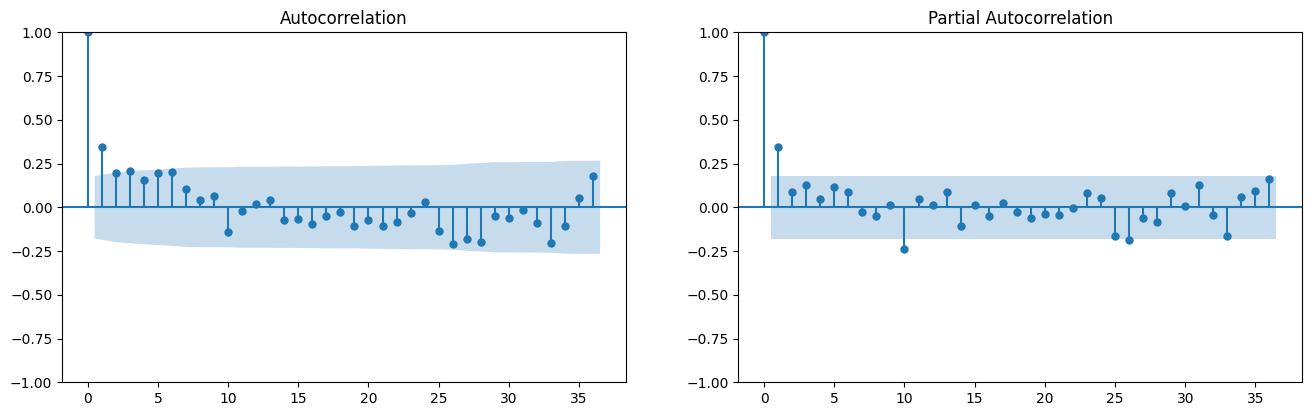

In [20]:
acf_pacf(result_pele_salvador.values, 36)

#### Pulmao

<Axes: xlabel='Data de Diagnostico'>

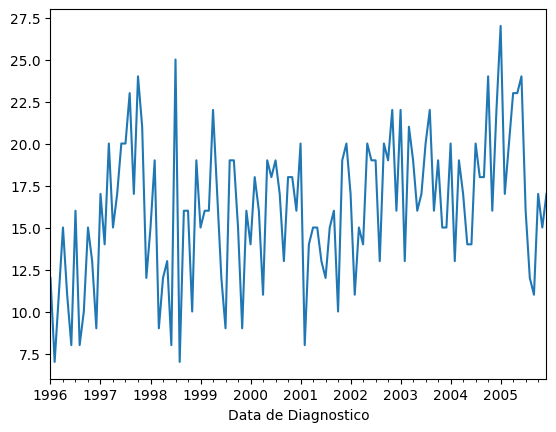

In [21]:
df_pulmao = df_pulmao.sort_values(by='Data de Diagnostico')
df_pulmao = df_pulmao.set_index('Data de Diagnostico')
result_pulmao_salvador = df_pulmao.resample("ME")['Nome do RCBP'].count()

result_pulmao_salvador.plot()

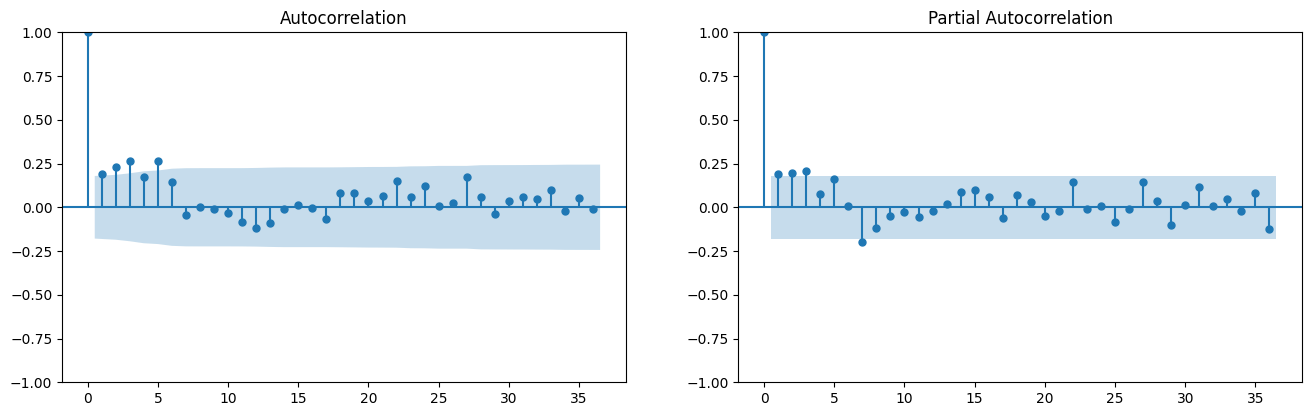

In [22]:
acf_pacf(result_pulmao_salvador.values, 36)